<img style="float:center" src="img/explore.jpg" width=300/>

# Exploring the data

When we look at spreadsheets or large amounts of data, its hard for us to understand what is really happening. But when we visually interpret the data then everything starts making sense.

<img style="float::left" src="img/explore-reason.png" />

## Step by step approach

** First let us look at our data **

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fractions import division
import os

In [2]:
%matplotlib inline


In [3]:
data_df = pd.read_csv('data/data.csv')

In [4]:
# lets take a sneak peek at the data

In [5]:
data_df.head()

,Unnamed: 0,model,date,serial_number,capacity_bytes,failure,smart_1_raw,smart_5_raw,smart_9_raw,smart_194_raw,smart_197_raw
0,0,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z0XA,3000592982016,0,0,0,6887,29,0
1,1,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNG9Z7LA,3000592982016,0,0,0,6444,26,0
2,2,Hitachi HDS5C3030ALA630,2013-08-07,MJ0351YNGABYAA,3000592982016,0,0,0,5592,28,0
3,3,Hitachi HDS5C4040ALE630,2013-08-07,PL1321LAG34XWH,4000787030016,0,0,0,3555,30,0
4,4,Hitachi HDS5C4040ALE630,2013-08-07,PL1311LAG2205A,4000787030016,0,0,0,3557,28,0


In [6]:
# now let us see what is the size of the dataset

In [7]:
data_df.shape

(2995393, 11)

In [8]:
#now we see that there are different models of hard disks, let us list them

<img style="float:center" src="img/distinct.gif" />

In [9]:
hard_disk_models_df = pd.DataFrame(data_df.model.unique(),columns=['model'])

In [10]:
hard_disk_models_df.head()

,model
0,Hitachi HDS5C3030ALA630
1,Hitachi HDS5C4040ALE630
2,Hitachi HDS723030ALA640
3,Hitachi HDS722020ALA330
4,ST31500541AS


In [11]:
hard_disk_models_df.count()[0]

39

In [12]:
print "Total number of distinct models : "+ hard_disk_models_df.count()[0]

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S34') dtype('S34') dtype('S34')

In [13]:
#let us see how many models are there in total
print "Total number of distinct models : "+ str(hard_disk_models_df.count()[0])

Total number of distinct models : 39


In [14]:
# Exerice 1: Find the distinct number of serial numbers

In [15]:
# Exercise 2: Find the distinct number of capacity bytes}

<img style="float:center" src="img/group-by.gif" />

#### Question 1. Find the total number of hard disks for a given model

In [16]:
# Now let us see how many hard disks are there for each model and 
#visualize it
# We see that serial number represents the hard disk and they are related to a model i.e multiple serial numbers belongs
# to one type of model


In [17]:
total_hard_disk_per_model_df = pd.DataFrame(data_df.groupby(['model']).serial_number.nunique())

In [18]:
total_hard_disk_per_model_df.head()

,serial_number
model,
HGST HMS5C4040ALE640,45
Hitachi HDS5C3030ALA630,4606
Hitachi HDS5C3030BLE630,1
Hitachi HDS5C4040ALE630,2685
Hitachi HDS722020ALA330,4733


In [19]:
total_hard_disk_per_model_df = total_hard_disk_per_model_df.reset_index()

In [20]:
total_hard_disk_per_model_df.columns = ['model','total_hard_disk']

In [21]:
total_hard_disk_per_model_df.head(39)

,model,total_hard_disk
0,HGST HMS5C4040ALE640,45
1,Hitachi HDS5C3030ALA630,4606
2,Hitachi HDS5C3030BLE630,1
3,Hitachi HDS5C4040ALE630,2685
4,Hitachi HDS722020ALA330,4733
5,Hitachi HDS723020BLA642,8
6,Hitachi HDS723030ALA640,1034
7,Hitachi HDS723030BLE640,7
8,Hitachi HDT721010SLA360,15
9,SAMSUNG HD103UJ,14


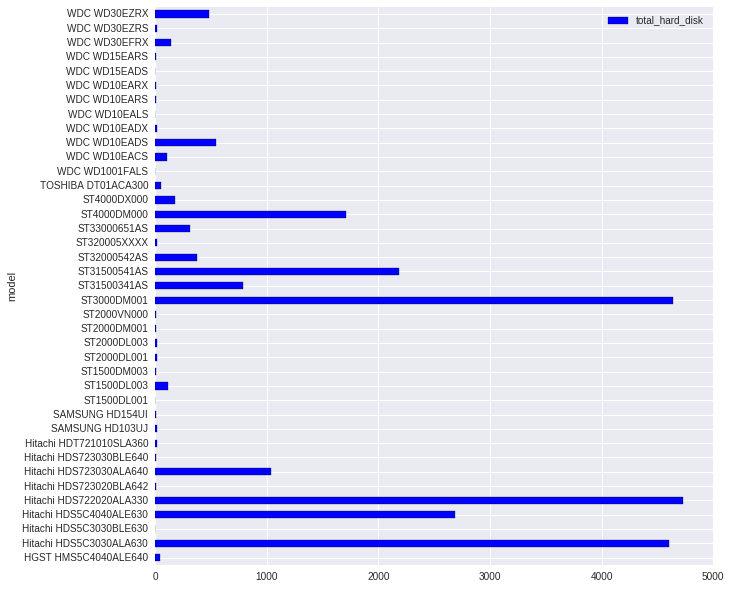

In [22]:
total_hard_disk_per_model_df.plot(kind="barh",x="model",y="total_hard_disk",figsize=(10,10))

In [23]:
# Sort and plot

In [24]:
total_hard_disk_per_model_df.sort_values(by='total_hard_disk',inplace=True)

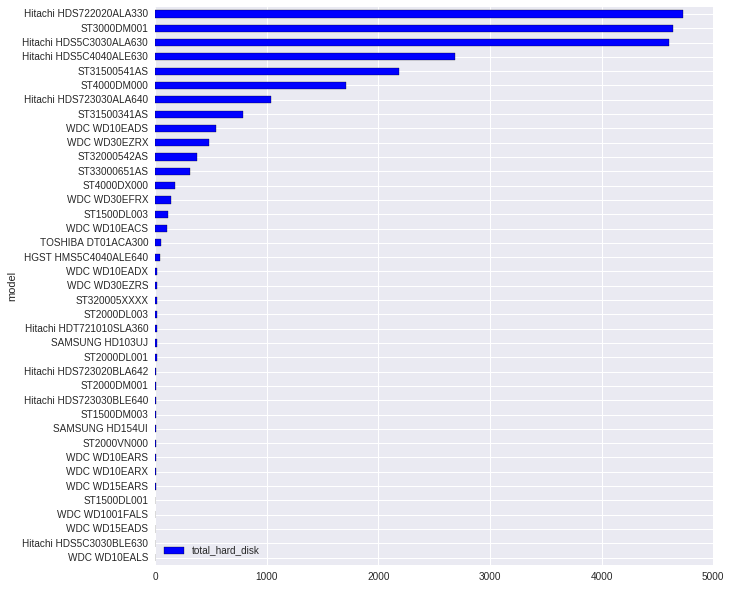

In [25]:
total_hard_disk_per_model_df.plot(kind="barh",x="model",y="total_hard_disk",figsize=(10,10))

In [26]:
#Exercise 3: Find the count of different capacity bytes for a model and plot with and without sorting

#### Question 2. Find failures for a hard disk models

In [27]:
# Now let us find the failures for a given hard disk model

In [28]:
hard_disk_failures_df = pd.DataFrame(data_df.groupby('model').failure.sum())

In [29]:
hard_disk_failures_df.head()

,failure
model,
HGST HMS5C4040ALE640,1
Hitachi HDS5C3030ALA630,15
Hitachi HDS5C3030BLE630,0
Hitachi HDS5C4040ALE630,16
Hitachi HDS722020ALA330,16


In [30]:
hard_disk_failures_df = hard_disk_failures_df.reset_index()

In [31]:
hard_disk_failures_df.head()

,model,failure
0,HGST HMS5C4040ALE640,1
1,Hitachi HDS5C3030ALA630,15
2,Hitachi HDS5C3030BLE630,0
3,Hitachi HDS5C4040ALE630,16
4,Hitachi HDS722020ALA330,16


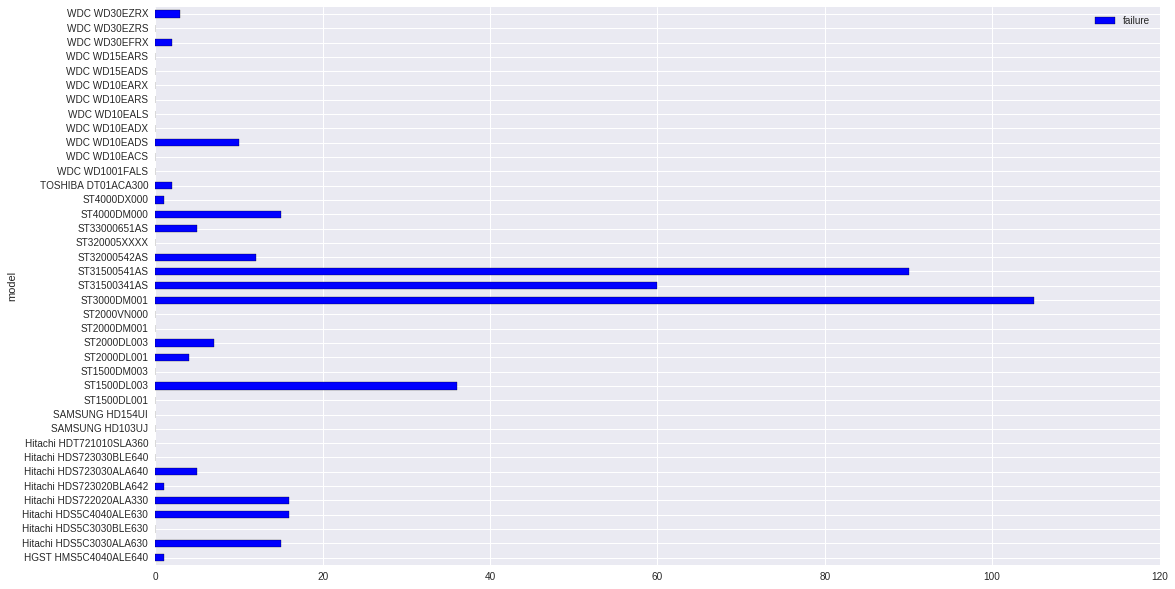

In [32]:
hard_disk_failures_df.plot(kind="barh",x="model",y="failure",figsize=(18,10))

In [33]:
# Exercise 4 : sort the above data frame and plot it

#### Question 3. How to now compute failure rate for a model 

In [34]:
# Now let us express the failure / total number of hard disks as ratio. 
# This will give us an understanding of models and their failure behavior

In [35]:
# To get that data, instead of computing again, we can join the 2 data frames and compute the new column
merged_df = total_hard_disk_per_model_df.merge(hard_disk_failures_df,how='inner',on='model')

In [36]:
merged_df.head()

,model,total_hard_disk,failure
0,WDC WD10EALS,1,0
1,Hitachi HDS5C3030BLE630,1,0
2,WDC WD15EADS,1,0
3,WDC WD1001FALS,1,0
4,ST1500DL001,2,0


In [37]:
# now let us compute the ratio of failure number/total_hard_disk of hard disk

merged_df['ratio'] = merged_df.failure / merged_df.total_hard_disk 

In [38]:
merged_df.head(25)

,model,total_hard_disk,failure,ratio
0,WDC WD10EALS,1,0,0.000000
1,Hitachi HDS5C3030BLE630,1,0,0.000000
2,WDC WD15EADS,1,0,0.000000
3,WDC WD1001FALS,1,0,0.000000
4,ST1500DL001,2,0,0.000000
5,WDC WD15EARS,3,0,0.000000
6,WDC WD10EARX,3,0,0.000000
7,WDC WD10EARS,4,0,0.000000
8,ST2000VN000,4,0,0.000000
9,SAMSUNG HD154UI,4,0,0.000000


In [39]:
merged_df.sort_values(by="ratio",ascending=False,inplace=True)

In [40]:
merged_df.head()

,model,total_hard_disk,failure,ratio
17,ST2000DL003,15,7,0.466667
14,ST2000DL001,12,4,0.333333
24,ST1500DL003,113,36,0.318584
13,Hitachi HDS723020BLA642,8,1,0.125000
31,ST31500341AS,785,60,0.076433


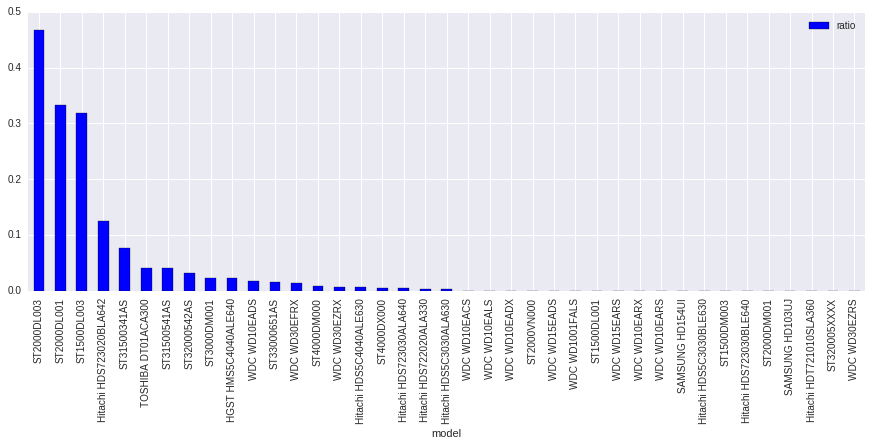

In [41]:
merged_df.plot(kind="bar",x="model",y="ratio",figsize=(15,5))

** The higher the ratio value is , more the failure for a model **

** Now we know which models fail the most, let us introduce a new feature in our analysis, capacity bytes. **

We are going feature by feature the reason being, the more features we add that add value to the outcome, we see how our understanding of the data starts changing.

** Let us look at the capacity bytes that are present **

In [42]:
capacity_bytes_df = pd.DataFrame(data_df.capacity_bytes.unique(),columns=['capacity_bytes'])

In [43]:
capacity_bytes_df.head()

,capacity_bytes
0,3000592982016
1,4000787030016
2,2000398934016
3,1500301910016
4,1000204886016


In [44]:
capacity_bytes_df.shape

(5, 1)

In [45]:
#Exercise : For a given capacity bytes, find the total number of failures and plot it

#### Question 4. Given a model and capacity bytes, what does failure count look like

In [46]:
failure_data_for_all_model_capacity_df = pd.DataFrame(data_df.groupby(['model','capacity_bytes']).failure.sum())

In [47]:
failure_data_for_all_model_capacity_df.head()

,,failure
model,capacity_bytes,
HGST HMS5C4040ALE640,4000787030016,1
Hitachi HDS5C3030ALA630,3000592982016,15
Hitachi HDS5C3030BLE630,3000592982016,0
Hitachi HDS5C4040ALE630,4000787030016,16
Hitachi HDS722020ALA330,2000398934016,16


In [48]:
failure_data_for_all_model_capacity_df = failure_data_for_all_model_capacity_df.reset_index()

In [49]:
failure_data_for_all_model_capacity_df.head(25)

,model,capacity_bytes,failure
0,HGST HMS5C4040ALE640,4000787030016,1
1,Hitachi HDS5C3030ALA630,3000592982016,15
2,Hitachi HDS5C3030BLE630,3000592982016,0
3,Hitachi HDS5C4040ALE630,4000787030016,16
4,Hitachi HDS722020ALA330,2000398934016,16
5,Hitachi HDS723020BLA642,2000398934016,1
6,Hitachi HDS723030ALA640,3000592982016,5
7,Hitachi HDS723030BLE640,3000592982016,0
8,Hitachi HDT721010SLA360,1000204886016,0
9,SAMSUNG HD103UJ,1000204886016,0


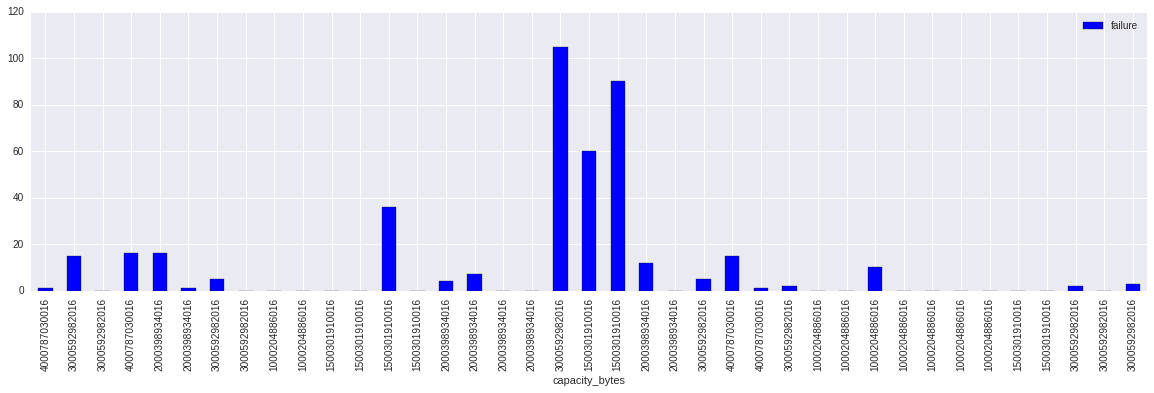

In [50]:
failure_data_for_all_model_capacity_df.plot(x="capacity_bytes",y="failure",kind="bar",figsize=(20,5))

### Looking at this chart can you tell what is not being represented right?

 We are having repeated entries for the same capacity and this really does not give us insights on the relation between capacity bytes data and the models. 
 

In [51]:
failure_data_for_all_model_capacity_df.head()

,model,capacity_bytes,failure
0,HGST HMS5C4040ALE640,4000787030016,1
1,Hitachi HDS5C3030ALA630,3000592982016,15
2,Hitachi HDS5C3030BLE630,3000592982016,0
3,Hitachi HDS5C4040ALE630,4000787030016,16
4,Hitachi HDS722020ALA330,2000398934016,16


In [52]:
failure_data_for_all_model_capacity_df_pivot = failure_data_for_all_model_capacity_df.pivot("model","capacity_bytes","failure")

In [53]:
failure_data_for_all_model_capacity_df_pivot.head()

capacity_bytes,1000204886016,1500301910016,2000398934016,3000592982016,4000787030016
model,,,,,
HGST HMS5C4040ALE640,NaN,NaN,NaN,NaN,1
Hitachi HDS5C3030ALA630,NaN,NaN,NaN,15,NaN
Hitachi HDS5C3030BLE630,NaN,NaN,NaN,0,NaN
Hitachi HDS5C4040ALE630,NaN,NaN,NaN,NaN,16
Hitachi HDS722020ALA330,NaN,NaN,16,NaN,NaN


In [54]:
# we see that for some models and their respective capacitys we do not have a fail count, lets fill it with 0

In [55]:
failure_data_for_all_model_capacity_df_pivot.fillna(0,inplace=True)
failure_data_for_all_model_capacity_df_pivot.head()

capacity_bytes,1000204886016,1500301910016,2000398934016,3000592982016,4000787030016
model,,,,,
HGST HMS5C4040ALE640,0,0,0,0,1
Hitachi HDS5C3030ALA630,0,0,0,15,0
Hitachi HDS5C3030BLE630,0,0,0,0,0
Hitachi HDS5C4040ALE630,0,0,0,0,16
Hitachi HDS722020ALA330,0,0,16,0,0


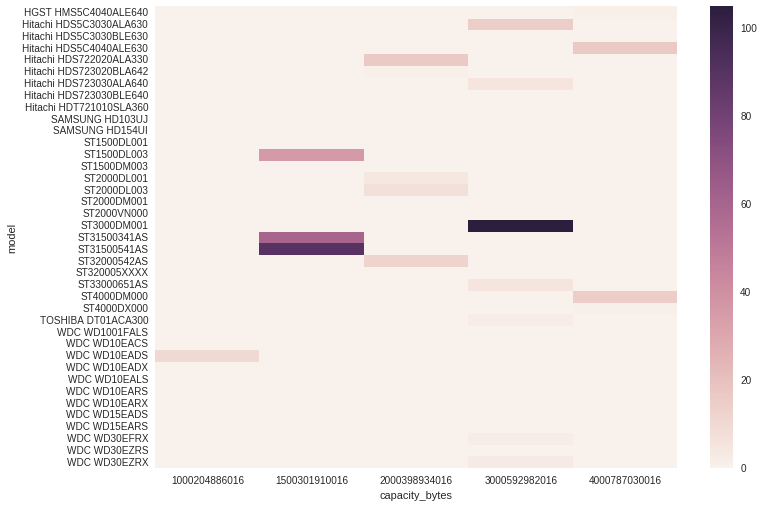

In [56]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(failure_data_for_all_model_capacity_df_pivot,ax=ax)

** This heat map gives us a better understanding of model, capacity vs failure **

In [57]:
#Exercise : Find count of total hard disks for a model with different capacities and plot it

##### The above charts give us an explanation of which models failed the most, which models had the most number of hard disks running , the ratio of hard disk : failure rate and hard disk and for a given capacity of a model what the failure count looks like

<img style="float:center" src="img/explore-clock.png" width=150/>

##### Hard disk data is time series data, so let us start using time

#### Question 5. Let us count how many days each hard disk ran

In [104]:
days_ran_hard_disk_df = pd.DataFrame(data_df.groupby(['model','serial_number']).date.count())

In [105]:
days_ran_hard_disk_df = days_ran_hard_disk_df.reset_index()
days_ran_hard_disk_df.head()

,model,serial_number,date
0,HGST HMS5C4040ALE640,PL1331LAG4013H,132
1,HGST HMS5C4040ALE640,PL1331LAG40AJH,132
2,HGST HMS5C4040ALE640,PL1331LAG5AR5H,132
3,HGST HMS5C4040ALE640,PL1331LAG5AUYH,132
4,HGST HMS5C4040ALE640,PL1331LAG5AV3H,132


In [106]:
days_ran_hard_disk_df.columns = ['model','serial_number','total_days']


In [107]:
days_ran_hard_disk_df.head()

,model,serial_number,total_days
0,HGST HMS5C4040ALE640,PL1331LAG4013H,132
1,HGST HMS5C4040ALE640,PL1331LAG40AJH,132
2,HGST HMS5C4040ALE640,PL1331LAG5AR5H,132
3,HGST HMS5C4040ALE640,PL1331LAG5AUYH,132
4,HGST HMS5C4040ALE640,PL1331LAG5AV3H,132


In [72]:
days_ran_hard_disk_df.shape

(24891, 2)

In [108]:
# Exercise : Visualize the above dataframe 

# Need to find a way to visualize the above statement as the data points are large

#### Question 6. Find the average running time for failed hard disks and average running time for hard disks that have not failed

In [119]:
fail_model_serial_number = pd.DataFrame(data_df[['model','serial_number']].loc[data_df['failure'] == 1 ])

In [120]:
fail_model_serial_number.head()

,model,serial_number
2827,ST2000DL003,5YD48KS5
3462,ST31500541AS,9XW01DJ0
5071,ST31500341AS,9VS22HAQ
5843,Hitachi HDS722020ALA330,JK1175YAHU30KX
8537,ST3000DM001,S1F11CSB


In [99]:
# to the above data frame let us add a column that says failed = 1

In [122]:
fail_model_serial_number['failure'] = 1

In [123]:
fail_model_serial_number.head()

,model,serial_number,failure
2827,ST2000DL003,5YD48KS5,1
3462,ST31500541AS,9XW01DJ0,1
5071,ST31500341AS,9VS22HAQ,1
5843,Hitachi HDS722020ALA330,JK1175YAHU30KX,1
8537,ST3000DM001,S1F11CSB,1


In [ ]:
# now let us merge the previous data frame which had serial number and count of days

In [130]:
fail_suc_days_serial_num_df = days_ran_hard_disk_df.merge(fail_model_serial_number,how="left",
                                                                    on=['model','serial_number'])

In [131]:
fail_suc_days_serial_num_df.head()

,model,serial_number,total_days,failure
0,HGST HMS5C4040ALE640,PL1331LAG4013H,132,NaN
1,HGST HMS5C4040ALE640,PL1331LAG40AJH,132,NaN
2,HGST HMS5C4040ALE640,PL1331LAG5AR5H,132,NaN
3,HGST HMS5C4040ALE640,PL1331LAG5AUYH,132,NaN
4,HGST HMS5C4040ALE640,PL1331LAG5AV3H,132,NaN


In [132]:
# now we can fill all the Nan with 0
fail_suc_days_serial_num_df.fillna(0,inplace=True)

In [133]:
fail_suc_days_serial_num_df.head()

,model,serial_number,total_days,failure
0,HGST HMS5C4040ALE640,PL1331LAG4013H,132,0
1,HGST HMS5C4040ALE640,PL1331LAG40AJH,132,0
2,HGST HMS5C4040ALE640,PL1331LAG5AR5H,132,0
3,HGST HMS5C4040ALE640,PL1331LAG5AUYH,132,0
4,HGST HMS5C4040ALE640,PL1331LAG5AV3H,132,0


In [ ]:
#now what can we do with this data? Is this useful? What can I generate from the above data that gives 
# me a little more insight ?

In [128]:
# we can generate what is the average time of failure and average success time

In [137]:
fail_suc_days_serial_num_df.total_days.loc[fail_suc_days_serial_num_df['failure'] == 1]

25         7
1074       8
1273      42
1315      24
1421       7
1459      34
1670      42
1816       8
2339      24
2358      24
2894      24
3767      24
3768      10
3951      90
4045      97
4591      24
4696      92
4773     111
4816      58
4986     111
5581     101
5605      18
5637      39
5898     101
5969      42
6248     115
6393      52
6499      71
6578      64
6781      63
        ... 
22213      2
22214      1
22280     20
22359     15
22375     14
22420     15
22421     24
22457     26
22565     14
22590     11
22615      7
23208      2
23508      5
23538     42
23552    106
23681     28
23852     29
23870     92
23986     52
24110     22
24141     56
24182     85
24190     29
24213      7
24219     51
24332      8
24388      8
24584     92
24841     99
24870     52
Name: total_days, dtype: int64

In [142]:
fail_suc_days_serial_num_df.failure.loc[fail_suc_days_serial_num_df['failure'] == 1].count()

406

In [155]:
fail_suc_days_serial_num_df['average_failure'] = fail_suc_days_serial_num_df.total_days.loc[fail_suc_days_serial_num_df['failure'] == 1]\
            / float(fail_suc_days_serial_num_df.failure.loc[fail_suc_days_serial_num_df['failure'] == 1].count())

In [161]:
fail_suc_days_serial_num_df.average_failure.isnull()

True